<a href="https://colab.research.google.com/github/mayc-zul/Calculadora/blob/main/Modelos_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importar librerias

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC



### 2. Cargar data

In [2]:
#categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
categories = [
    "alt.atheism",
    "comp.graphics",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware",
    "comp.windows.x",
    "misc.forsale",
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "rec.sport.hockey",
    "sci.crypt",
    "sci.electronics",
    "sci.med",
    "sci.space",
    "soc.religion.christian",
    "talk.politics.guns",
    "talk.politics.mideast",
    "talk.politics.misc",
    "talk.religion.misc",
]
# Train
train = fetch_20newsgroups(subset="train",remove=('headers', 'footers', 'quotes'))
dftrain = pd.DataFrame(train.data, columns=['text'])
dftrain["categories"] = [train.target_names[i] for i in train.target]
dftrain["labels"] = [i for i in train.target]


# Test

test = fetch_20newsgroups(subset="test", remove=('headers', 'footers', 'quotes'))
dftest = pd.DataFrame(test.data, columns=['text'])
dftest["categories"] = [test.target_names[i] for i in test.target]
dftest["labels"] = [i for i in test.target]


In [3]:
print("set de entrenamiento {} - set de prueba {} ".format(dftrain.shape[0], dftest.shape[0]))

set de entrenamiento 11314 - set de prueba 7532 


### 3. Carcular TF-IDF

In [3]:
#train, test = train_test_split(df, test_size = 0.20)
TFIDFvectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X_train = TFIDFvectorizer.fit_transform(dftrain['text'])
Y_train = dftrain['labels']

X_test = TFIDFvectorizer.transform(dftest['text'])
Y_test = dftest['labels']

target_names = train.target_names

### 4. Logistic Regression

In [ ]:
LRclf = LogisticRegression()
LRclf.fit(X_train.toarray(), Y_train.values)

LogisticRegression()

In [ ]:
lrpred = LRclf.predict(X_train.toarray())
train_score = accuracy_score(Y_train.values, lrpred) * 100
print("Train accuracy score: {:.2f}%".format(train_score))

lrpred = LRclf.predict(X_test.toarray())
test_score = accuracy_score(Y_test.values, lrpred) * 100
print("Test accuracy score: {:.2f}%".format(train_score))


Train accuracy score: 91.44%
Test accuracy score: 91.44%


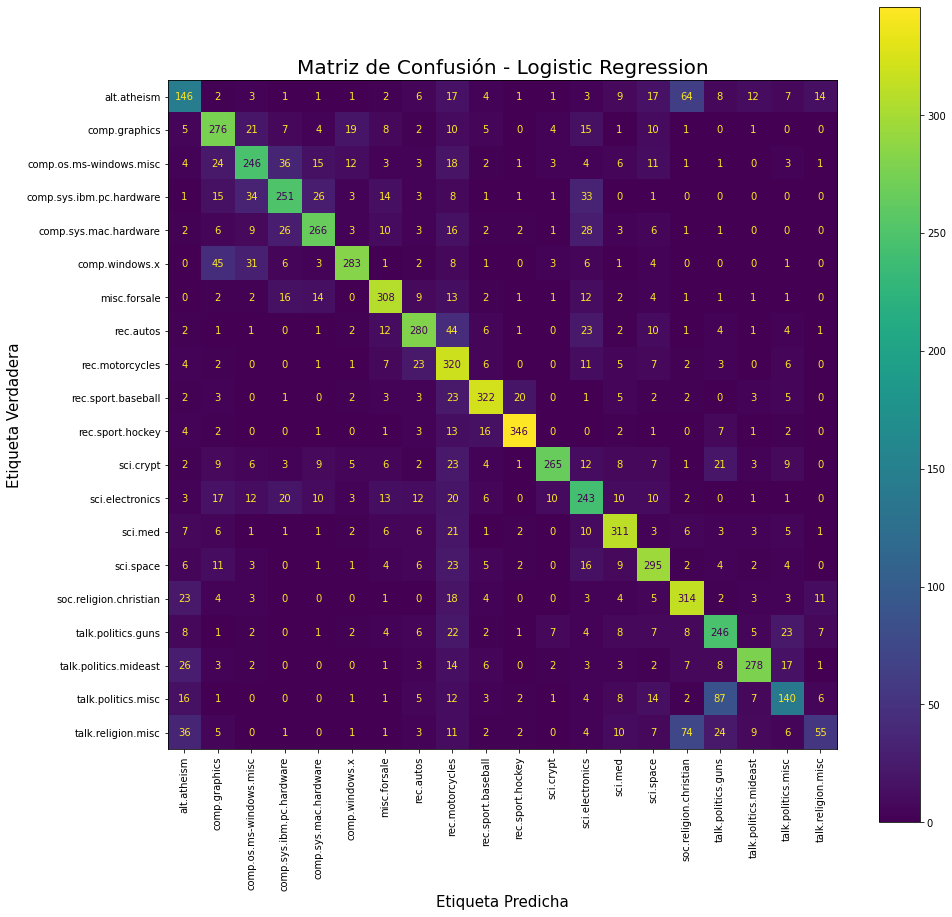

In [ ]:
cm = confusion_matrix(Y_test.values, lrpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=train.target_names)

fig, ax = plt.subplots(figsize=(15, 15))
disp = disp.plot(xticks_rotation='vertical', ax=ax)
plt.title("Matriz de Confusión - Logistic Regression", fontsize=20)
plt.ylabel("Etiqueta Verdadera", fontsize=15)
plt.xlabel("Etiqueta Predicha", fontsize=15)

plt.show()

In [ ]:
# Metricas
target_names = train.target_names
print(classification_report(Y_test.values, lrpred, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.49      0.46      0.47       319
           comp.graphics       0.63      0.71      0.67       389
 comp.os.ms-windows.misc       0.65      0.62      0.64       394
comp.sys.ibm.pc.hardware       0.68      0.64      0.66       392
   comp.sys.mac.hardware       0.75      0.69      0.72       385
          comp.windows.x       0.83      0.72      0.77       395
            misc.forsale       0.76      0.79      0.77       390
               rec.autos       0.74      0.71      0.72       396
         rec.motorcycles       0.49      0.80      0.61       398
      rec.sport.baseball       0.81      0.81      0.81       397
        rec.sport.hockey       0.90      0.87      0.88       399
               sci.crypt       0.89      0.67      0.76       396
         sci.electronics       0.56      0.62      0.59       393
                 sci.med       0.76      0.79      0.77       396
         

### 5. Naive Bayes - MultinomialNB

In [19]:
NBclf = MultinomialNB(alpha = 0.1)
NBclf.fit(X_train.toarray(), Y_train)

MultinomialNB(alpha=0.1)

In [20]:
NBpred = NBclf.predict(X_train.toarray())
train_score = accuracy_score(Y_train.values, NBpred)*100
print("Train accuracy score: {:.2f}%".format(train_score))

NBpred = NBclf.predict(X_test.toarray())
train_score = accuracy_score(Y_test.values, NBpred)*100
print("Test accuracy score: {:.2f}%".format(train_score))

Train accuracy score: 93.74%
Test accuracy score: 70.22%


Text(0.5, 0, 'Etiqueta Predicha')

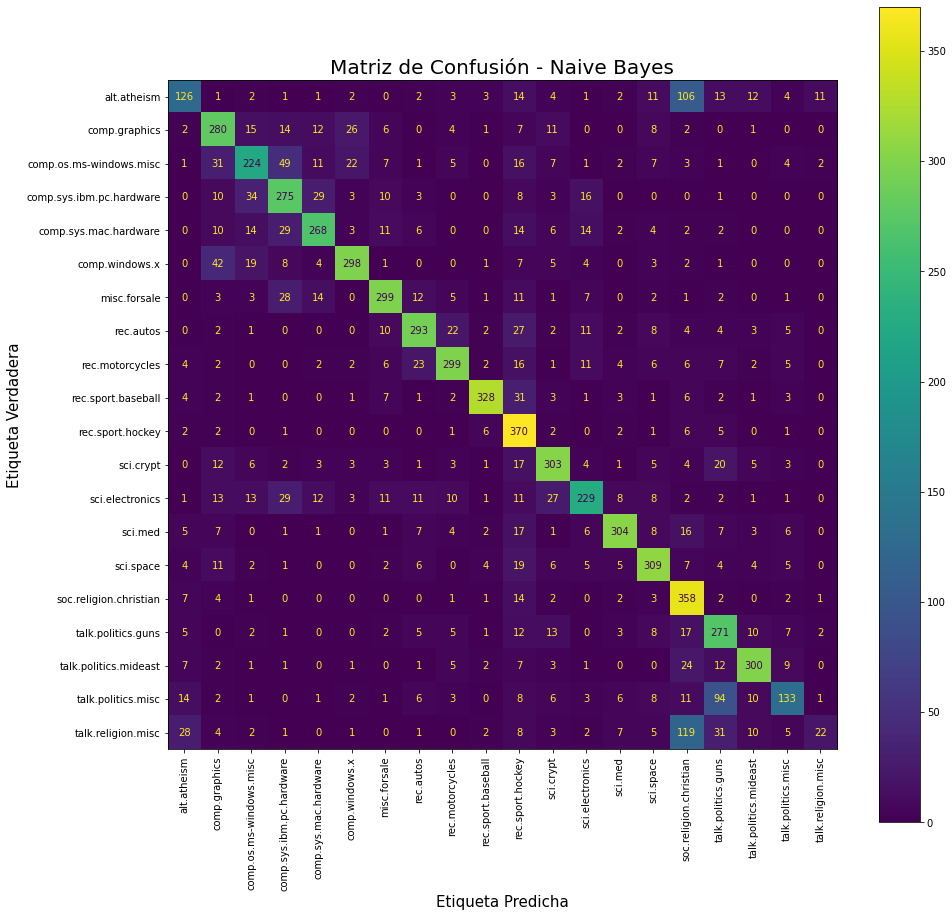

In [21]:
target_names = train.target_names
cm = confusion_matrix(Y_test.values, NBpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

fig, ax = plt.subplots(figsize=(15, 15))
disp = disp.plot(xticks_rotation='vertical', ax=ax)
plt.title("Matriz de Confusión - Naive Bayes", fontsize=20)
plt.ylabel("Etiqueta Verdadera", fontsize=15)
plt.xlabel("Etiqueta Predicha", fontsize=15)


In [22]:
# Metricas
print(classification_report(Y_test.values, NBpred, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.60      0.39      0.48       319
           comp.graphics       0.64      0.72      0.68       389
 comp.os.ms-windows.misc       0.66      0.57      0.61       394
comp.sys.ibm.pc.hardware       0.62      0.70      0.66       392
   comp.sys.mac.hardware       0.75      0.70      0.72       385
          comp.windows.x       0.81      0.75      0.78       395
            misc.forsale       0.79      0.77      0.78       390
               rec.autos       0.77      0.74      0.76       396
         rec.motorcycles       0.80      0.75      0.78       398
      rec.sport.baseball       0.92      0.83      0.87       397
        rec.sport.hockey       0.58      0.93      0.72       399
               sci.crypt       0.74      0.77      0.75       396
         sci.electronics       0.72      0.58      0.65       393
                 sci.med       0.86      0.77      0.81       396
         

### 6. Support vextor Machine

In [5]:
SVMclf = LinearSVC()
SVMclf.fit(X_train.toarray(), Y_train)

LinearSVC()

In [6]:
import joblib
joblib.dump(SVMclf, 'LinearSVC.pkl')

['LinearSVC.pkl']

In [7]:
SVMpred = SVMclf.predict(X_train.toarray())
train_score = accuracy_score(Y_train.values, SVMpred) * 100
print("Train accuracy score: {:.2f}%".format(train_score))

SVMpred = SVMclf.predict(X_test.toarray())
train_score = accuracy_score(Y_test.values, SVMpred) * 100
print("Test accuracy score: {:.2f}%".format(train_score))


Train accuracy score: 97.14%
Test accuracy score: 68.76%


Text(0.5, 0, 'Etiqueta Predicha')

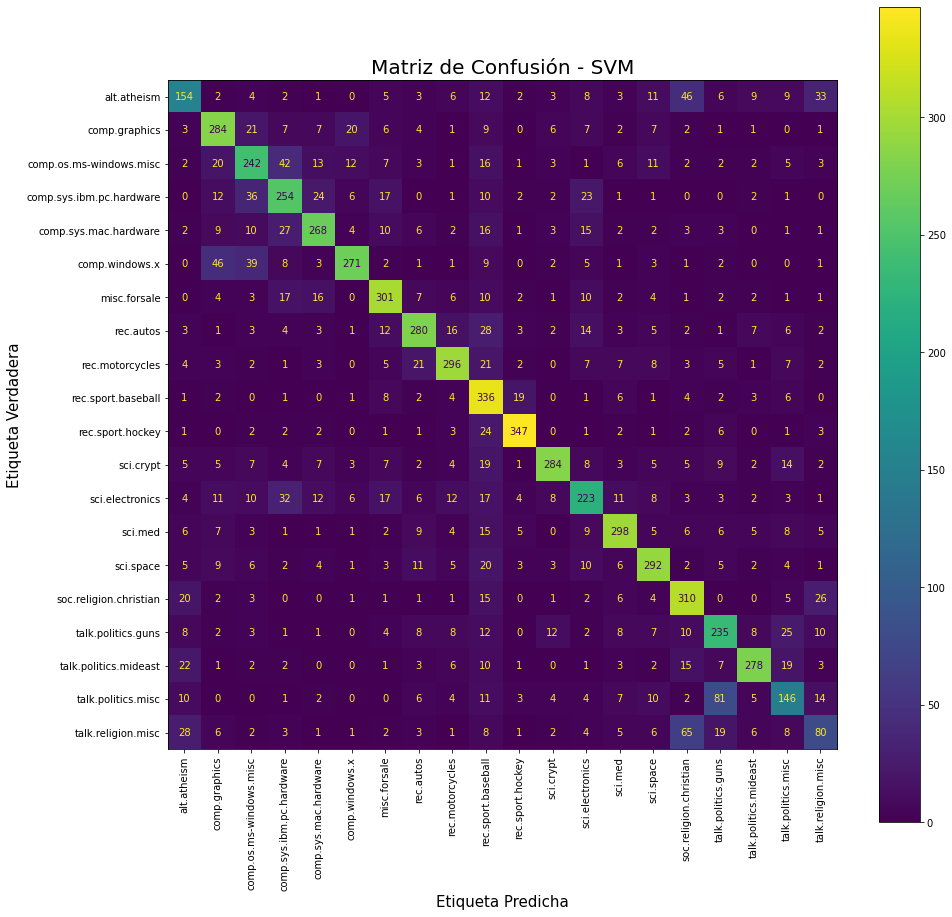

In [8]:
cm = confusion_matrix(Y_test.values, SVMpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

fig, ax = plt.subplots(figsize=(15, 15))
disp = disp.plot(xticks_rotation='vertical', ax=ax)
plt.title("Matriz de Confusión - SVM", fontsize=20)
plt.ylabel("Etiqueta Verdadera", fontsize=15)
plt.xlabel("Etiqueta Predicha", fontsize=15)

In [9]:
# Metricas
print(classification_report(Y_test.values, SVMpred, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.55      0.48      0.52       319
           comp.graphics       0.67      0.73      0.70       389
 comp.os.ms-windows.misc       0.61      0.61      0.61       394
comp.sys.ibm.pc.hardware       0.62      0.65      0.63       392
   comp.sys.mac.hardware       0.73      0.70      0.71       385
          comp.windows.x       0.83      0.69      0.75       395
            misc.forsale       0.73      0.77      0.75       390
               rec.autos       0.74      0.71      0.72       396
         rec.motorcycles       0.77      0.74      0.76       398
      rec.sport.baseball       0.54      0.85      0.66       397
        rec.sport.hockey       0.87      0.87      0.87       399
               sci.crypt       0.85      0.72      0.78       396
         sci.electronics       0.63      0.57      0.60       393
                 sci.med       0.78      0.75      0.77       396
         

### 7. Perceptron

In [14]:
percfl = Perceptron()
percfl.fit(X_train.toarray(), Y_train)

Perceptron()

In [15]:
perpred = percfl.predict(X_train.toarray())
train_score = accuracy_score(Y_train.values, perpred) * 100
print("Train accuracy score: {:.2f}%".format(train_score))

perpred = percfl.predict(X_test.toarray())
train_score = accuracy_score(Y_test.values, perpred) * 100
print("Test accuracy score: {:.2f}%".format(train_score))

Train accuracy score: 97.09%
Test accuracy score: 64.76%


Text(0.5, 0, 'Etiqueta Predicha')

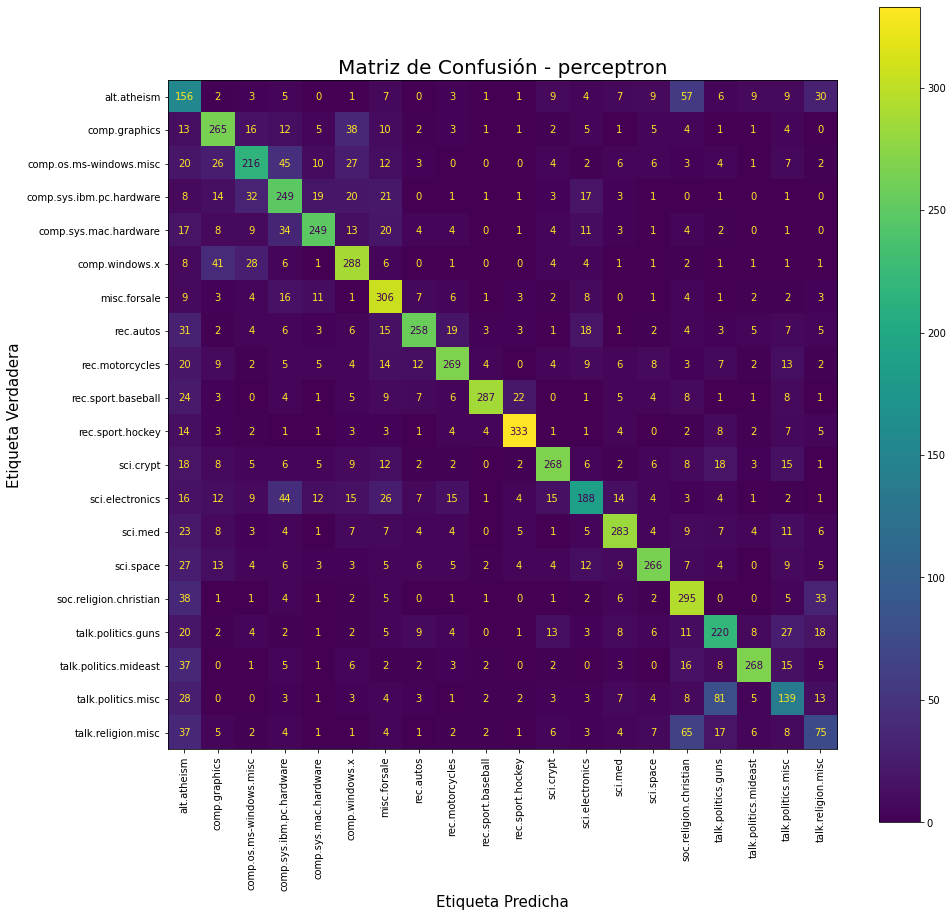

In [17]:
cm = confusion_matrix(Y_test.values, perpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

fig, ax = plt.subplots(figsize=(15, 15))
disp = disp.plot(xticks_rotation='vertical', ax=ax)
plt.title("Matriz de Confusión - perceptron", fontsize=20)
plt.ylabel("Etiqueta Verdadera", fontsize=15)
plt.xlabel("Etiqueta Predicha", fontsize=15)

In [18]:
# Metricas
print(classification_report(Y_test.values, SVMpred, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.55      0.48      0.52       319
           comp.graphics       0.67      0.73      0.70       389
 comp.os.ms-windows.misc       0.61      0.61      0.61       394
comp.sys.ibm.pc.hardware       0.62      0.65      0.63       392
   comp.sys.mac.hardware       0.73      0.70      0.71       385
          comp.windows.x       0.83      0.69      0.75       395
            misc.forsale       0.73      0.77      0.75       390
               rec.autos       0.74      0.71      0.72       396
         rec.motorcycles       0.77      0.74      0.76       398
      rec.sport.baseball       0.54      0.85      0.66       397
        rec.sport.hockey       0.87      0.87      0.87       399
               sci.crypt       0.85      0.72      0.78       396
         sci.electronics       0.63      0.57      0.60       393
                 sci.med       0.78      0.75      0.77       396
         